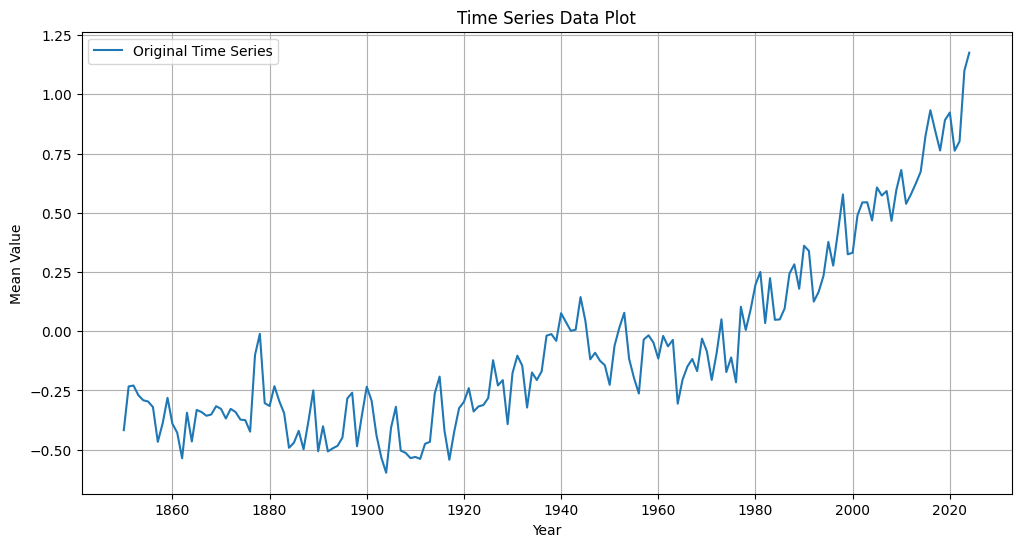

ADF Statistic: 2.476446005370727
p-value: 0.999041859406313
Critical Values:
   1%: -3.470126426071447
   5%: -2.8790075987120027
   10%: -2.5760826967621644
Conclusion: Data is not stationary (Fail to Reject H0)


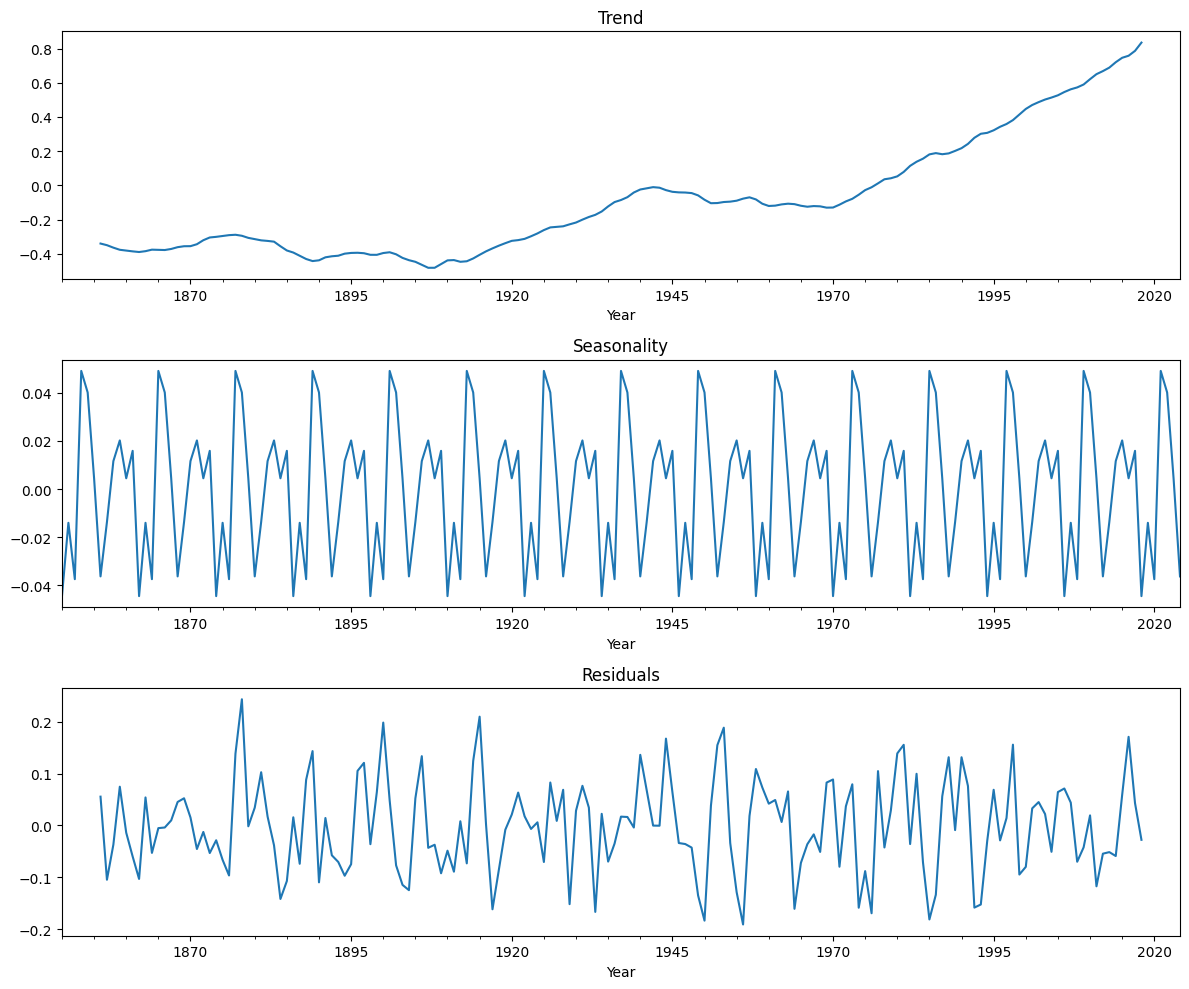

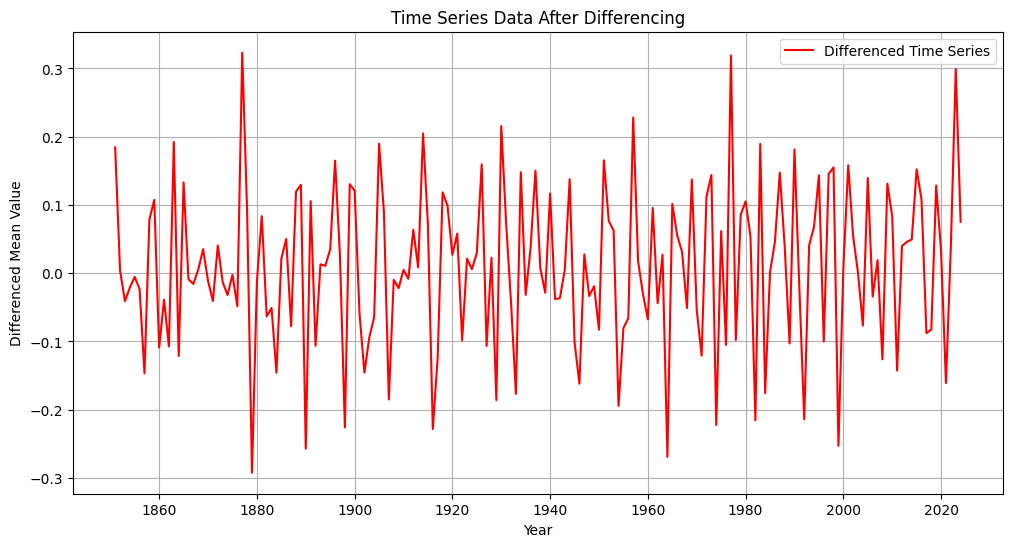

ADF Statistic after differencing: -8.259943524108992
p-value: 5.115453198086792e-13
Critical Values:
   1%: -3.469648263987657
   5%: -2.878798906308495
   10%: -2.5759713094779593
Conclusion: Data is stationary (Reject H0)


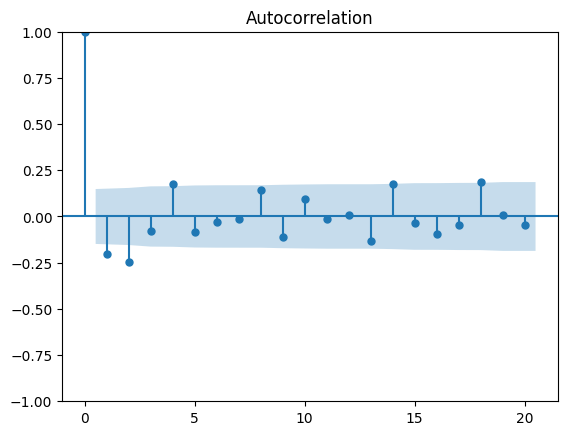

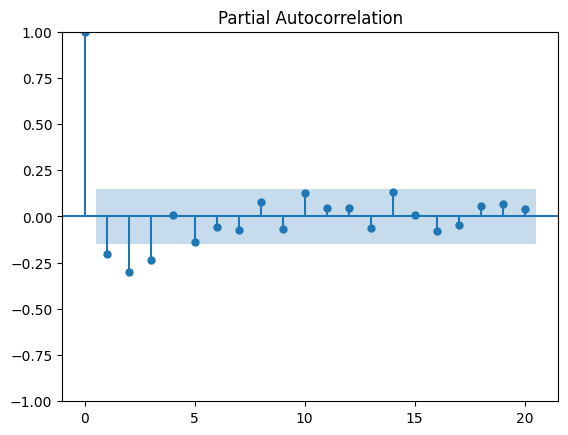

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots

# Load data
filepath = "C://Users//Jayashrinidhi V//OneDrive//Documents//VScode//TimeSeriesAnalysis//globaltemp.csv"
df = pd.read_csv(filepath, parse_dates=['Year'])
df.set_index('Year', inplace=True)

# Remove duplicate indices
df = df[~df.index.duplicated(keep='first')]

# Ensure column selection for plotting
if 'Mean' not in df.columns:
    raise ValueError("Column 'Mean' not found in the dataset. Check the CSV file.")

# Plot original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Mean'], label='Original Time Series')
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.title("Time Series Data Plot")
plt.legend()
plt.grid()
plt.show()

# Perform ADF test before differencing
result = adfuller(df['Mean'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")
if result[1] <= 0.05:
    print("Conclusion: Data is stationary (Reject H0)")
else:
    print("Conclusion: Data is not stationary (Fail to Reject H0)")

# Seasonal Decomposition
decomposition = seasonal_decompose(df['Mean'], model='additive', period=12)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonality')
decomposition.resid.plot(ax=ax3, title='Residuals')
plt.tight_layout()
plt.show()

# Apply differencing
df['Mean'] = df['Mean'].diff(1)
df.dropna(inplace=True)

# Plot differenced series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Mean'], label='Differenced Time Series', color='red')
plt.xlabel("Year")
plt.ylabel("Differenced Mean Value")
plt.title("Time Series Data After Differencing")
plt.legend()
plt.grid()
plt.show()

# Perform ADF test after differencing
result = adfuller(df['Mean'].dropna())
print("ADF Statistic after differencing:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")
if result[1] <= 0.05:
    print("Conclusion: Data is stationary (Reject H0)")
else:
    print("Conclusion: Data is not stationary (Fail to Reject H0)")

# Plot ACF and PACF
tsaplots.plot_acf(df['Mean'].dropna(), lags=20)
tsaplots.plot_pacf(df['Mean'].dropna(), lags=20)
plt.show()
